<a href="https://colab.research.google.com/github/Vyoma-Kanani/TensorFlow/blob/main/Mnist_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset


In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds

Loading data

In [ ]:
# Alternative to Load Dataset through tensorflow_datasets
(ds_train, ds_test), ds_info = tfds.load(
    # Same as tensorflow dataset catalog
    "mnist",
    # If validation then add that as well
    split=["train", "test"],
    # So that it doesnot see the exact same sequence of the data
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)

ds_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

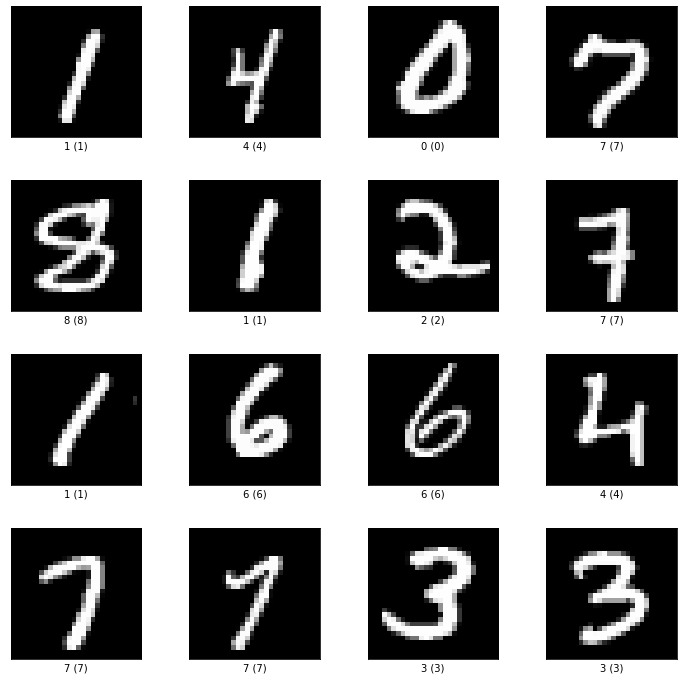

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [ ]:
# We have to set as_supervised as False
# fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)
# print(ds_info)

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

So there are 60000 images with 28*28 pixsel.<br>
As we are gonna send them to neural network v require 1 column with those feature value.

In [ ]:
# As we want to keep those 60000 values as it is so -1 and we have flatten 2 dimensions 28*28 = 784 
# The data are gonna be numpy arrays
# Also Normalize the value so rather than being from 0 to 255 it should be between 0 and 1

x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

# Can also do
# x_train = tf.convert_to_tensor(x_train)

## Models
### Sequential API (Very convenient but not very flexible )
It only allows you to have one input maps to one output


In [ ]:
model = keras.Sequential(
    [
      keras.Input(shape=(28*28)), #To get the summary of model
      layers.Dense(512, activation="relu"),    # Dense is for fully connected layer    
      layers.Dense(256, activation='relu', name='SecondLayer'),
      layers.Dense(10) #for output and activation is Soft Max which is going to be handled by loss function
    #  If we mention activition function i.e softmax here then from_logits will be false else true
    ]
)

# Alternative of above code Here we can write inbetwwen model.summary to get the info 
model = keras.Sequential()
model.add(keras.Input(shape=(784)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu", name="my_layer"))
model.add(layers.Dense(10))

# To extract specific layer output which helps during debugging
model = keras.Model(inputs = model.inputs, outputs = [model.layers[-1].output]) 
# Here -1 means the last layer, -2 will be the last second layer and so on 

# Can even access layer through name
model = keras.Model(inputs = model.inputs, outputs = [model.get_layer('my_layer').output])

# This is for the specific we send in
feature = model.predict(x_train)
print(feature.shape)
# It will print 60000,256

# To get all layers
model = keras.Model(inputs = model.inputs, outputs = [layer.output for layer in model.layers] )

features = model.predict(x_train)
for feature in features:
  print(feature.shape)

# If we remove keras.Input then we could not print summary here insted we can but after model.fit onen the connection is send to model 
print(model.summary())



(60000, 256)
(60000, 784)
(60000, 512)
(60000, 256)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
my_layer (Dense)             (None, 256)               131328    
Total params: 533,248
Trainable params: 533,248
Non-trainable params: 0
_________________________________________________________________
None


### Functional API (A bit more flexible)
Handel multiple input and multiple output


In [ ]:
input = keras.Input(shape=(28*28))
x= layers.Dense(512, activation='relu', name='First_layer')(input)  #Basically we are connecting input layer with x
x= layers.Dense(256,activation='relu', name='Second_layer')(x)
outputs = layers.Dense(10, activation='softmax')(x)
# If we mention activition in output layer we have to set from_logits = False which is also default argument

model = keras.Model(inputs=input, outputs = outputs)

print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fd1c7fa7a90>>


#### Using SGD (Stochastic Gradient Descent) as optimizer

In [ ]:
# How to configure the training part of the network
# This specifies the network configuration
model.compile(
    #As we did logit = true its going to send it in to a soft max first and then it is going to map it to SparseCategoricalCrossentropy  
    # SparseCategoricalCrossentropy is for numerical categorical if we only write CategorialCrossentropy then we have to use Onehotencoding
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    # optimizer = keras.optimizers.Adam(lr=0.001),  #learning rate
    # Using Different optimizers
    optimizer = keras.optimizers.SGD(lr=0.001),
    metrics = ["accuracy"],
)

#Defines concrete training of the network
model.fit(x_train, y_train,  batch_size = 32, epochs = 5, verbose = 2 )

# After Training lets test it 
model.evaluate(x_test, y_test, batch_size = 32, verbose = 2 )

Epoch 1/5
1875/1875 - 8s - loss: 1.6565 - accuracy: 0.6084
Epoch 2/5
1875/1875 - 8s - loss: 0.7922 - accuracy: 0.8337
Epoch 3/5
1875/1875 - 8s - loss: 0.5440 - accuracy: 0.8673
Epoch 4/5
1875/1875 - 8s - loss: 0.4509 - accuracy: 0.8833
Epoch 5/5
1875/1875 - 8s - loss: 0.4013 - accuracy: 0.8924
313/313 - 1s - loss: 0.3637 - accuracy: 0.9036


[0.3636521100997925, 0.9035999774932861]

#### Using Adagrad (Adaptive Gradient Algorithm) as optimizer
Adaptive Gradient Algorithm (Adagrad) is an algorithm for gradient-based optimization. 

In [ ]:
model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer = keras.optimizers.Adagrad(lr=0.001),  #learning rate
    metrics = ["accuracy"],
)

model.fit(x_train, y_train,  batch_size = 32, epochs = 5, verbose = 2 )
model.evaluate(x_test, y_test, batch_size = 32, verbose = 2 )

Epoch 1/5
1875/1875 - 9s - loss: 0.0159 - accuracy: 0.9954
Epoch 2/5
1875/1875 - 9s - loss: 0.0125 - accuracy: 0.9964
Epoch 3/5
1875/1875 - 9s - loss: 0.0110 - accuracy: 0.9969
Epoch 4/5
1875/1875 - 9s - loss: 0.0099 - accuracy: 0.9973
Epoch 5/5
1875/1875 - 9s - loss: 0.0092 - accuracy: 0.9975
313/313 - 1s - loss: 0.0629 - accuracy: 0.9826


[0.06293357163667679, 0.9825999736785889]

#### Using RMSprop as Optimizer

In [ ]:
model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer = keras.optimizers.RMSprop(lr=0.001),  #learning rate
    metrics = ["accuracy"],
)

model.fit(x_train, y_train,  batch_size = 32, epochs = 5, verbose = 2 )
model.evaluate(x_test, y_test, batch_size = 32, verbose = 2 )

Epoch 1/5
1875/1875 - 14s - loss: 0.0153 - accuracy: 0.9956
Epoch 2/5
1875/1875 - 13s - loss: 0.0127 - accuracy: 0.9969
Epoch 3/5
1875/1875 - 13s - loss: 0.0111 - accuracy: 0.9973
Epoch 4/5
1875/1875 - 13s - loss: 0.0106 - accuracy: 0.9975
Epoch 5/5
1875/1875 - 13s - loss: 0.0078 - accuracy: 0.9981
313/313 - 1s - loss: 0.1532 - accuracy: 0.9842


[0.15321926772594452, 0.9842000007629395]

#### Using Adam as Optimizer
Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [ ]:
model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer = keras.optimizers.Adam(lr=0.001),  #learning rate
    metrics = ["accuracy"],
)

model.fit(x_train, y_train,  batch_size = 32, epochs = 5, verbose = 2 )
model.evaluate(x_test, y_test, batch_size = 32, verbose = 2 )

Epoch 1/5
1875/1875 - 10s - loss: 0.1695 - accuracy: 0.9491
Epoch 2/5
1875/1875 - 9s - loss: 0.0780 - accuracy: 0.9751
Epoch 3/5
1875/1875 - 9s - loss: 0.0538 - accuracy: 0.9825
Epoch 4/5
1875/1875 - 9s - loss: 0.0398 - accuracy: 0.9871
Epoch 5/5
1875/1875 - 9s - loss: 0.0330 - accuracy: 0.9896
313/313 - 1s - loss: 0.0797 - accuracy: 0.9785


[0.07970888167619705, 0.9785000085830688]

Comparing SGD, Adagrad, RMSprop, and Adam it is seen that for MNIST dataset the model with highest accuracy is obtained using RMSprop optimizer.

---



---



## RNNs, GRUs, LSTMs and Bidirectionality

Reloding the data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape([-1, 28, 28]).astype("float32") / 255.0
x_test = x_test.reshape([-1, 28, 28]).astype("float32") / 255.0

### RNN

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28))) #We dont to have a specific number of time step we dont need to specify that dementions
model.add(
    # It will return the output for each time step. In that way we can stack multiple RNN layers on top of each other.
    # Here we are going to have 28 time step
    layers.SimpleRNN(256, return_sequences=True, activation='tanh'),
)
model.add(layers.SimpleRNN(256, activation='tanh'))
# Output Layer
model.add(layers.Dense(10))

print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f617928f590>>


### GRU

This should work better than Simple RNN

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28))) #We dont to have a specific number of time step we dont need to specify that dementions
model.add(
    layers.GRU(256, return_sequences=True, activation='tanh'),
)
model.add(layers.GRU(256, activation='tanh'))
# Output Layer
model.add(layers.Dense(10))

print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f6176e9f590>>


### LSTMs

A little better than GRUs

One Directional

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28))) #We dont to have a specific number of time step we dont need to specify that dementions
model.add(
    layers.LSTM(256, return_sequences=True, activation='tanh'),
)
model.add(layers.LSTM(256, activation='tanh'))
# Output Layer
model.add(layers.Dense(10))

print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f61793fc710>>


Bidirectional LSTMs

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28))) #We dont to have a specific number of time step we dont need to specify that dementions
model.add(
    # We are specifying number of nodes for each hidden state i.e 256
    layers.Bidirectional(
        layers.LSTM(256, return_sequences=True, activation='tanh'),
    )
    # We are going to get 512 nodes instead of 256
    # One going Forward and One going Backward
)
model.add(
    layers.Bidirectional(
      layers.LSTM(256, activation='tanh')    
    )

# Output Layer
model.add(layers.Dense(10))

print(model.summary)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Epoch 1/10
938/938 - 278s - loss: 0.3075 - accuracy: 0.8990
Epoch 2/10
938/938 - 271s - loss: 0.0838 - accuracy: 0.9743
Epoch 3/10
938/938 - 273s - loss: 0.0583 - accuracy: 0.9820
Epoch 4/10
938/938 - 277s - loss: 0.0452 - accuracy: 0.9857
Epoch 5/10
938/938 - 286s - loss: 0.0388 - accuracy: 0.9877
Epoch 6/10
938/938 - 284s - loss: 0.0326 - accuracy: 0.9898
Epoch 7/10
938/938 - 274s - loss: 0.0289 - accuracy: 0.9912
Epoch 8/10
938/938 - 277s - loss: 0.0231 - accuracy: 0.9925
Epoch 9/10
938/938 - 275s - loss: 0.0193 - accuracy: 0.9939
Epoch 10/10
938/938 - 279s - loss: 0.0203 - accuracy: 0.9936
157/157 - 14s - loss: 0.0356 - accuracy: 0.9900


[0.0355784110724926, 0.9900000095367432]

---
## Model Subclassing
---

Reloding the data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Here we are adding Number of Channels
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

Common Structure is <br>
CNN -> BatchNorm -> ReLU

In [ ]:
class CNNBlock(layers.Layer):
  # Here layers is going to keep track of everything under the hood for doing back propogation and all

  def __init__(self, out_channels, kernel_size = 3):
    super(CNNBlock, self).__init__()
    self.conv = layers.Conv2D(out_channels, kernel_size, padding= 'same')
    self.bn = layers.BatchNormalization()

  def call(self, input_tensor, training = False):
    x = self.conv(input_tensor)
    x = self.bn(x, training = training)
    x = tf.nn.relu(x)
    return x 


In [ ]:
model = keras.Sequential(
    [
     CNNBlock(32),
     CNNBlock(64),
     CNNBlock(128),
     layers.Flatten(),
     layers.Dense(10),
    ]
)

Simpling compiling using model subclass 

In [ ]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy'], 
)

model.fit(x_train, y_train, batch_size=64, epochs=3, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Epoch 1/3
938/938 - 623s - loss: 0.5802 - accuracy: 0.9467
Epoch 2/3
938/938 - 624s - loss: 0.1009 - accuracy: 0.9813
Epoch 3/3
938/938 - 616s - loss: 0.0352 - accuracy: 0.9894
157/157 - 25s - loss: 0.0594 - accuracy: 0.9843


[0.0593649223446846, 0.9843000173568726]

Creating a Resedual Network


In [ ]:
class ResBlock(layers.Layer):
    def __init__(self, channels):
        super(ResBlock, self).__init__()
        self.channels = channels
        # There are 3 blocks and each block is CNN, a batchnorm and ReLU
        self.cnn1 = CNNBlock(channels[0], 3)
        self.cnn2 = CNNBlock(channels[1], 3)
        self.cnn3 = CNNBlock(channels[2], 3)
        # MaxPooling is for inpute size the height and width
        self.pooling = layers.MaxPooling2D()
        # To have same number of channels
        self.identity_mapping = layers.Conv2D(channels[1], 3, padding="same")

    def call(self, input_tensor, training=False):
        x = self.cnn1(input_tensor, training=training)
        x = self.cnn2(x, training=training)
        x = self.cnn3(x + self.identity_mapping(input_tensor), training=training,)
        x = self.pooling(x)
        return x

To have a final model we inherit keras.Model
<br>
Which can have the functionality of fit i.e training a model, evaluating a model 

In [ ]:
class ResNet_Like(keras.Model):
    def __init__(self, num_classes=10):
        super(ResNet_Like, self).__init__()
        # Specifying number of channels for each of the CNN block in this RES block
        self.block1 = ResBlock([32, 32, 64])
        self.block2 = ResBlock([128, 128, 256])
        self.block3 = ResBlock([128, 256, 512])
        # Average pool height and Width can also use layers.Flatten()
        self.pool = layers.GlobalAveragePooling2D()
        self.classifier = layers.Dense(num_classes)

    def call(self, input_tensor, training=False):
        x = self.block1(input_tensor, training=training)
        x = self.block2(x, training=training)
        x = self.block3(x, training=training)
        x = self.pool(x, training=training)
        x = self.classifier(x)
        return x

    # This will overwrite the model call. To get output shape
    def model(self):
        x = keras.Input(shape=(28, 28, 1))
        return keras.Model(inputs=[x], outputs=self.call(x))

In [ ]:
model = ResNet_Like().model()
base_input = model.layers[0].input
base_output = model.layers[2].output
output = layers.Dense(10)(layers.Flatten()(base_output))
model = keras.Model(base_input, output)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

938/938 - 1029s - loss: 0.1030 - accuracy: 0.9690
157/157 - 46s - loss: 0.0375 - accuracy: 0.9869


INFO:tensorflow:Assets written to: pretrained/assets


INFO:tensorflow:Assets written to: pretrained/assets


---
### Custom Layer
---

Reloading the data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

Creating a Custom Dense Layer

In [ ]:
class Dense(layers.Layer):
    def __init__(self, units, input_dim):
        super(Dense, self).__init__()
        # initializing Weight 
        self.w = self.add_weight(
            # name is for saving and loading models
            name="w",
            # input demention is the number of nodes we have and the unit is the nodes we are going to map it to. So when we are mapping the layer to 64 the unit is 64
            shape=(input_dim, units),
            initializer="random_normal",
            # For the case where some parameters are not trainable. Here all the parameters are trainable
            trainable=True,
        )
        self.b = self.add_weight(
            name="b", shape=(units,), initializer="zeros", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

Now to call the dense layer inside MyModel we use self.dense1 = Dense(64,784) <br>
Now to run the layer regardless of mentioning dimentions
<br>So to avoide mentioning the input part while calling Dense lets use build method  

In [ ]:
class Dense(layers.Layer):
    def __init__(self, units):
        super(Dense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            name="w",
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            name="b", shape=(self.units,), initializer="random_normal", trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

Creating Custom ReLU layer as well

In [ ]:
class MyReLU(layers.Layer):
    def __init__(self):
        super(MyReLU, self).__init__()

    def call(self, x):
        return tf.math.maximum(x, 0)

In [ ]:
class MyModel(keras.Model):  # model.fit, model.evalute, model.predict
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__()
        # Creating 2 Dense layers 
        self.dense1 = Dense(64)
        self.dense2 = Dense(num_classes)
        self.relu = MyReLU()

        # self.dense1 = layers.Dense(64)
        # self.dense3 = layers.Dense(num_classes)

    def call(self, x):
        x = self.relu(self.dense1(x))
        return self.dense2(x)

In [ ]:
model = MyModel()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/20
1875/1875 - 2s - loss: 0.3481 - accuracy: 0.9037
Epoch 2/20
1875/1875 - 2s - loss: 0.1671 - accuracy: 0.9518
Epoch 3/20
1875/1875 - 2s - loss: 0.1204 - accuracy: 0.9650
Epoch 4/20
1875/1875 - 2s - loss: 0.0944 - accuracy: 0.9722
Epoch 5/20
1875/1875 - 2s - loss: 0.0765 - accuracy: 0.9769
Epoch 6/20
1875/1875 - 2s - loss: 0.0641 - accuracy: 0.9806
Epoch 7/20
1875/1875 - 2s - loss: 0.0546 - accuracy: 0.9837
Epoch 8/20
1875/1875 - 2s - loss: 0.0461 - accuracy: 0.9857
Epoch 9/20
1875/1875 - 2s - loss: 0.0402 - accuracy: 0.9883
Epoch 10/20
1875/1875 - 2s - loss: 0.0348 - accuracy: 0.9892
Epoch 11/20
1875/1875 - 2s - loss: 0.0303 - accuracy: 0.9907
Epoch 12/20
1875/1875 - 2s - loss: 0.0260 - accuracy: 0.9921
Epoch 13/20
1875/1875 - 2s - loss: 0.0233 - accuracy: 0.9930
Epoch 14/20
1875/1875 - 2s - loss: 0.0199 - accuracy: 0.9943
Epoch 15/20
1875/1875 - 2s - loss: 0.0183 - accuracy: 0.9948
Epoch 16/20
1875/1875 - 2s - loss: 0.0158 - accuracy: 0.9950
Epoch 17/20
1875/1875 - 2s - loss

[0.10938333719968796, 0.9735000133514404]

### Saving and Loading Models


*   To Save a Model weight 
*   Save and Load Entire Model (Serializing Model)
  * Save Witghts
  * Model Architecture
  * Training Configuration (model.compile)
  * Optimizers and states 

  So when we are saving and Loading entire model it is going to save as a data structure that means it can be loaded on different tensorflow frameworks like tensorflow Javascript, tensorflow Lite. We don't need to do any conversion  

So after eveluating we can append the code for saving.


In [ ]:
# model.save_weights('foldername')
# To save entire model
# model.save('folderName')

# To load the model which is entirely saved
# model = keras.models.load_model('foldername')